In [5]:
import numpy as np
import sklearn
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import plotly.graph_objects as go

m1_1= 22
m1_2 = 8
m2_1 = 24
m2_2 = 12 
sd_1 = 4
sd_2 = 3

x1_1 = np.random.normal(m1_1, math.sqrt(sd_1), 50)
x1_2 = np.random.normal(m1_2, math.sqrt(sd_2), 50)

x2_1 = np.random.normal(m2_1, math.sqrt(sd_1), 50)
x2_2 = np.random.normal(m2_2, math.sqrt(sd_2), 50)


In [7]:
d = {
    'x1': np.concatenate((x1_1, x1_2)),
    'x2': np.concatenate((x2_1, x2_2)),
    'class': [-1] * 50 + [1] * 50}

data = pd.DataFrame(d)

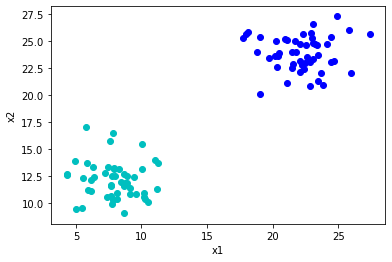

In [13]:
fig, axes = plt.subplots()
axes.scatter(data[data['class'] == -1]['x1'],
          data[data['class'] == -1]['x2'],
          c='b')
axes.scatter(data[data['class'] == 1]['x1'],
          data[data['class'] == 1]['x2'],
          c='c')
axes.set_ylabel('x2')
axes.set_xlabel('x1')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

test_size = [i / 10 for i in range(1, 10)]
accuracy = []

for i in test_size:
    x_train, x_test, y_train, y_test = train_test_split(
        data.drop(['class'], axis=1), 
        data['class'], 
        test_size=i)
 
    model = GaussianNB()
    model.fit(x_train, y_train)

    predicted = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, predicted))


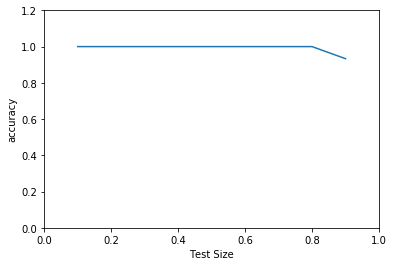

In [21]:
axes = plt.gca()
axes.set_ylabel('accuracy')
axes.set_xlabel('Test Size')
axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.2])
plt.plot(test_size, accuracy, label='Test')

Accuracy:  1.0
Confusion Matrix 
[[23  0]
 [ 0 27]]


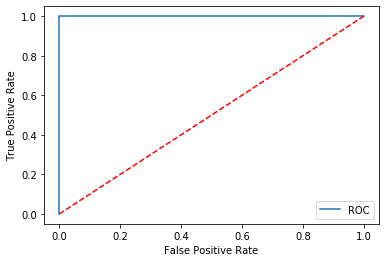

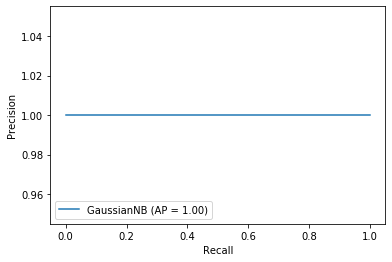

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(
    data.drop(['class'], axis=1), 
    data['class'], 
    test_size=0.5)

model = GaussianNB()
model.fit(x_train, y_train)

predicted = model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, predicted))
print('Confusion Matrix ')
print(confusion_matrix(y_test, predicted))

probs = model.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

display = plot_precision_recall_curve(model, x_test, y_test)